<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/regression_on_ltc_values2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initial lib

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn import metrics

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/LTC_1H.xlsx'

df=pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Check for null value

In [247]:
df.isnull().sum()

openTime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

# cast timestamp column

In [248]:
# change openTime column to string 
df.openTime  = df.openTime.astype(str)

# get substring of open time column
df.openTime =  df.openTime.str.slice(stop=10)

In [249]:
df.openTime = pd.to_datetime(df.openTime,unit='s')

# set length of data

In [250]:
m=20

# plot data

In [251]:
df['ind'] = df.index
df['mean'] = (df.open+df.high+df.low+df.close)/4
columns=['open','close','high','low','volume','openTime']
df.drop(columns,axis=1,inplace=True)

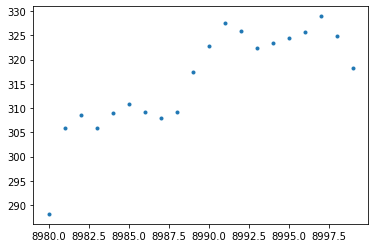

In [252]:

x=df['ind'].tail(m).values
y=df['mean'].tail(m).values

plt.plot(x,y,'.')

# Regression

In [253]:
regressor = LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
print('weight: ',regressor.coef_)
print('y_axis: ',regressor.intercept_)

weight:  [[1.49520301]]
y_axis:  [-13125.30318609]


In [255]:
min_pt = x.min() * regressor.coef_[0] + regressor.intercept_
max_pt = x.max() * regressor.coef_[0] + regressor.intercept_

b1=regressor.coef_
b0=regressor.intercept_

max_n =  0
abs_vale=0
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    abs_value= abs(y[i] - y_pred)
    if(abs_value>max_n):
      max_n = abs_value


min1=min_pt+max_n
max1=max_pt+max_n
min2=min_pt-max_n
max2=max_pt-max_n

min1=min1.reshape(-1,)
max1=max1.reshape(-1,)
min2=min2.reshape(-1,)
max2=max2.reshape(-1,)

# plot Regression channel

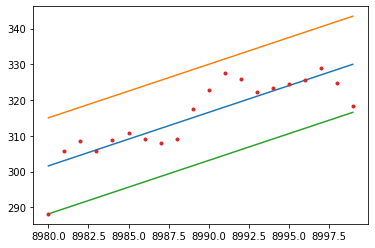

In [256]:
plt.plot([x.min(),x.max()],[min_pt,max_pt])
plt.plot([x.min(),x.max()],[min1,max1])
plt.plot([x.min(),x.max()],[min2,max2])
plt.plot(x,y,'.')